<a href="https://colab.research.google.com/github/FIOWB21/Machine-learning/blob/main/%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота №8
Завдання 1. Побудувати звичайну багатошарову нейронну мережу для датасету fashion mnist.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


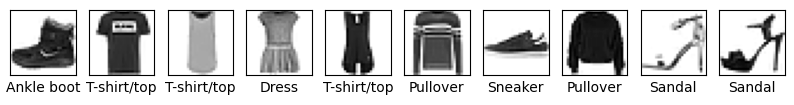

In [ ]:
#1. Завантаження датасету Fashion MNIST.
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#2. Показ 10-х зображень.
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#3. Нормалізація даних.
train_images = train_images / 255.0
test_images = test_images / 255.0

#4. Побудова архітектури моделі.
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(250, activation='relu'),
    layers.Dense(113, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#Компіляція моделі.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Виведення архітектури моделі.
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 250)                 │         128,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 113)                 │          28,363 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 559,673 (2.13 MB)

 Trainable params: 559,673 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#5. Використання ранньої зупинки та зменшення швидкості навчання.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

#6. Навчання моделі.
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr])

#7. Збереження моделі на Google Disk.
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/fashion_mnist_model.h5')

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7858 - loss: 0.6025 - val_accuracy: 0.8480 - val_loss: 0.4172 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8637 - loss: 0.3705 - val_accuracy: 0.8598 - val_loss: 0.3851 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8775 - loss: 0.3307 - val_accuracy: 0.8696 - val_loss: 0.3591 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8848 - loss: 0.3082 - val_accuracy: 0.8741 - val_loss: 0.3612 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8945 - loss: 0.2841 - val_accuracy: 0.8715 - val_loss: 0.3532 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8996 - loss: 0.2669 - val_accuracy: 0.8756 - val_loss: 0.3465 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9058 - l

Mounted at /content/drive


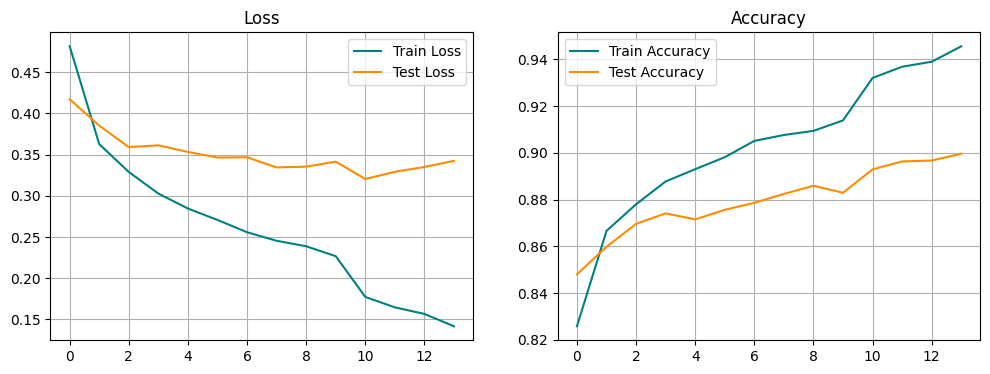

In [ ]:
#8. Побудова графіків функції втрат і точності.
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='teal')
plt.plot(history.history['val_loss'], label='Test Loss', color='darkorange')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='teal')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', color='darkorange')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

313/313 - 0s - 1ms/step - accuracy: 0.8929 - loss: 0.3204
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.82      0.80      0.81      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.81      0.80      0.81      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.71      0.73      0.72      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



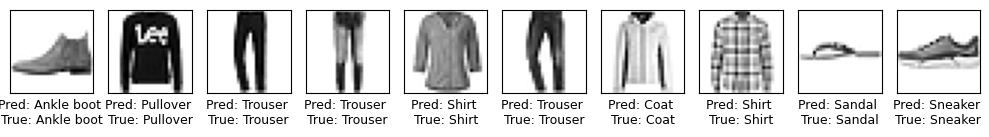

In [ ]:
#9. Виведення класифікаційного звіту.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)

#Перетворення прогнозів у мітки.
predicted_labels = np.argmax(predictions, axis=1)

#Виведення класифікаційного звіту.
print(classification_report(test_labels, predicted_labels, target_names=class_names))

#10. Виведення результатів розпізнавання із прогнозованим і справжнім класом.
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]} \nTrue: {class_names[test_labels[i]]}", fontsize=9)
plt.tight_layout()
plt.show()

Висновок: У цьому завданні успішно створено багатошарову нейронну мережу для класифікації зображень із датасету Fashion MNIST. Завдяки використанню технік ранньої зупинки та зниження швидкості навчання вдалося уникнути перенавчання і забезпечити стабільні результати на валідаційних даних. Графіки втрат і точності підтвердили ефективність моделі, а класифікаційний звіт надав детальну оцінку її роботи.

#Завдання 2. Побудувати нейронну мережу, аналогічну завданню 1, для датасету fashion mnist.

In [ ]:
!pip install keras-tuner -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from kerastuner.tuners import RandomSearch

<ipython-input-18-5270575026c6>:6: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
#Завантаження датасету Fashion MNIST.
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    #Додавання шарів, які будуть тюнуватися.
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                     min_value=35,
                                     max_value=512,
                                     step=32),
                        activation='relu',
                        kernel_regularizer=l2(0.001)))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

    model.add(Dense(10, activation='softmax'))

    #Компіляція моделі з оптимізатором, який також буде тюнуватися.
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_logs',
    project_name='fashion_mnist_classification'
)

#Визначення ранньої зупинки та зниження швидкості навчання.
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

tuner.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

#Отримання найкращої моделі.
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

#Тренування та оцінка моделі.
best_model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping, reduce_lr])

test_loss, test_acc = best_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Trial 10 Complete [00h 05m 19s]
val_accuracy: 0.8763999938964844

Best val_accuracy So Far: 0.8985999822616577
Total elapsed time: 00h 57m 02s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 323)                 │         253,555 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 323)                 │           1,292 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 323)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 99)                  │          32,076 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 99)                  │             396 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 99)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 288,319 (1.10 MB)

 Trainable params: 287,475 (1.10 MB)

 Non-trainable params: 844 (3.30 KB)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9043 - loss: 0.3185 - val_accuracy: 0.8777 - val_loss: 0.4094 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8971 - loss: 0.3404 - val_accuracy: 0.8822 - val_loss: 0.4046 - learning_rate: 1.0000e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8966 - loss: 0.3388 - val_accuracy: 0.8833 - val_loss: 0.3897 - learning_rate: 1.0000e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8960 - loss: 0.3415 - val_accuracy: 0.8826 - val_loss: 0.3955 - learning_rate: 1.0000e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8974 - loss: 0.3370 - val_accuracy: 0.8844 - val_loss: 0.4021 - learning_rate: 1.0000e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8991 - loss: 0.3343 - val_accuracy: 0.8768 - val_loss: 0.4068 - learning_rate: 1.0000e-04
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/ste

In [ ]:
#Збереження моделі на Google Disk.
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/fashion_mnist_model2.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


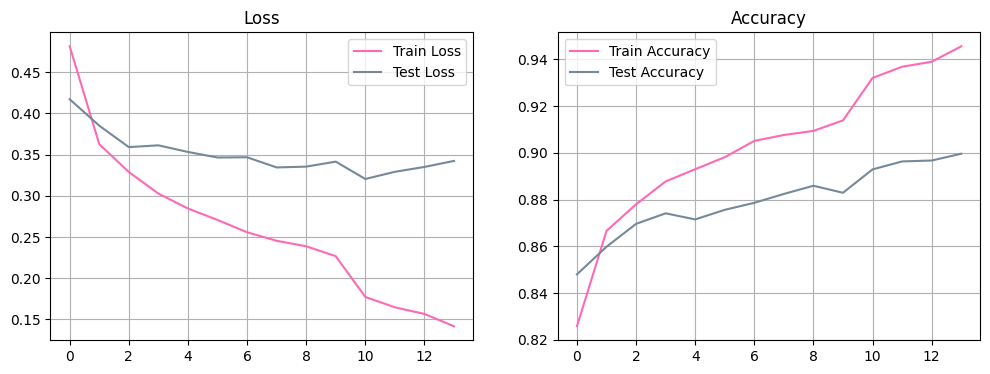

In [ ]:
#Побудова графіків функції втрат і точності.
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='hotpink')
plt.plot(history.history['val_loss'], label='Test Loss', color='lightslategray')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='hotpink')
plt.plot(history.history['val_accuracy'], label='Test Accuracy', color='lightslategray')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()

313/313 - 1s - 2ms/step - accuracy: 0.8929 - loss: 0.3204
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.82      0.80      0.81      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.81      0.80      0.81      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.71      0.73      0.72      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



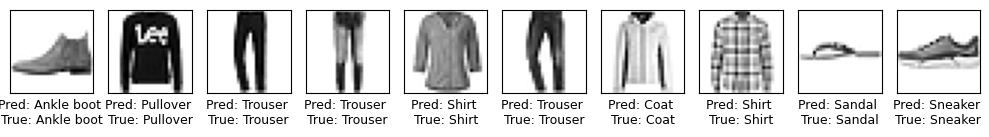

In [ ]:
#Виведення класифікаційного звіту.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)

#Перетворення прогнозів у мітки.
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(test_labels, predicted_labels, target_names=class_names))

#10. Виведення результатів розпізнавання із прогнозованим і справжнім класом.
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {class_names[predicted_labels[i]]} \nTrue: {class_names[test_labels[i]]}", fontsize=9)
plt.tight_layout()
plt.show()

Висновок: У цьому завданні була розроблена схожа нейронна мережа з використанням Keras Tuner для автоматичного підбору гіперпараметрів, що сприяло підвищенню точності моделі та зниженню функції втрат порівняно з першим завданням. Отримані результати підкреслюють важливість оптимізації гіперпараметрів для покращення роботи нейронних мереж.